Support material for Win-Vector article http://www.win-vector.com/blog/2015/10/baking-priors/

In [1]:
%load_ext rpy2.ipython

In [2]:
import sympy

In [3]:
[a,b] = sympy.symbols(['a','b'])
meanEqn = a/(a+b)
varEqn = a*b/((a+b)**2*(a+b+1))
eqnsNoEffect = [meanEqn-1/1000,varEqn-1/1000000]
eqnsEffect = [meanEqn-999/1000,varEqn-1/1000000]
[aNoEffect,bNoEffect] = sympy.solve(eqnsNoEffect,[a,b])[0]
print([aNoEffect,bNoEffect] )
aNoEffect = float(aNoEffect)
bNoEffect = float(bNoEffect)
[aEffect,bEffect] = sympy.solve(eqnsEffect,[a,b])[0]
print([aEffect,bEffect])
aEffect = float(aEffect)
bEffect = float(bEffect)

[0.998000000000000, 997.002000000000]
[997.002000000000, 0.998000000000000]


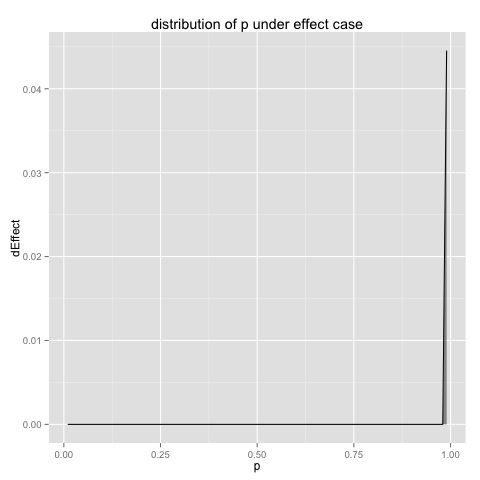

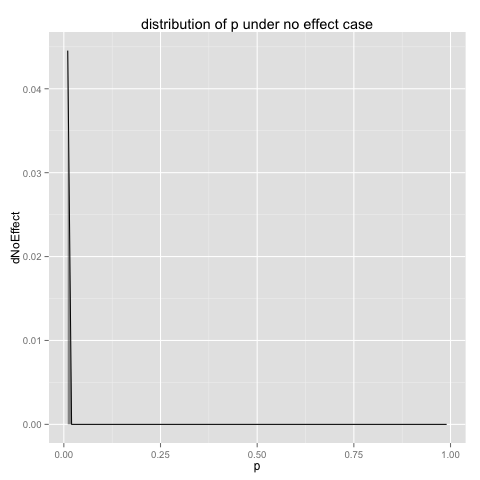

In [4]:
%%R -i aNoEffect,bNoEffect,aEffect,bEffect
suppressPackageStartupMessages(library('ggplot2'))

eps <- 0.01
d <- data.frame(p=seq(eps,1-eps,by=eps))
d$dNoEffect <- dbeta(d$p,shape1=aNoEffect,shape2=bNoEffect)
d$dEffect <- dbeta(d$p,shape1=aEffect,shape2=bEffect)
print(ggplot(data=d,aes(x=p,y=dEffect,ymax=dEffect,ymin=0)) + 
   geom_line() + geom_ribbon(alpha=0.5) + 
   ggtitle('distribution of p under effect case'))

print(ggplot(data=d,aes(x=p,y=dNoEffect,ymax=dNoEffect,ymin=0)) + 
   geom_line() + geom_ribbon(alpha=0.5) + 
   ggtitle('distribution of p under no effect case'))

In [5]:
%%R

# posterior probabilites are:
#  integral(P[event | p] P[p | model],p)/integral(P[p | model],p)
#  our data frame has enough to estimate this numerically (and integral(P[p | model],p)==1)

pWierdGivenEffect <- sum(d$p*d$dEffect)/sum(d$dEffect)
print(pWierdGivenEffect)
pWierdGivenNoEffect <- sum(d$p*d$dNoEffect)/sum(d$dNoEffect)
print(pWierdGivenNoEffect)

print(pWierdGivenEffect/(pWierdGivenEffect+pWierdGivenNoEffect))
print(pWierdGivenNoEffect/(pWierdGivenEffect+pWierdGivenNoEffect))

[1] 0.9899996
[1] 0.01000041
[1] 0.9899996
[1] 0.01000041
